# Doplňkové prvky grafů

Knihovna Matplotlib umožňuje přidávat do grafů mnoho doplňkových prvků:

- Šipky
- Informace o chybách měření (error bar)
- Dodatečné čáry
- Dodatečné popisy
- Anotace (kombinace textu a šipek)
- Obrázek jako pozadí

## Příprava dat

Pro demonstraci budeme používat meteorologická data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Načtení dat
df = pd.read_csv('Plots_data/Meteo data.csv', sep=';', decimal='.')

In [2]:
# Seznam prvních dnů měsíců
MONTH_CHANGE = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

# Seznam názvů měsíců
MONTHS = ['Leden', 'Únor', 'Březen', 'Duben', 'Květen', 'Červen',
                'Červenec', 'Srpen', 'Září', 'Říjen', 'Listopad', 'Prosinec']

In [3]:
mapping = {'Station code ' : 'code',
           'Station name' : 'name',
           'Average daily temperature' : 'avg_temp', 
           'Average daily relative humidity' :'avg_hum',
           'Average daily wind speed [m/s]' : 'avg_wind', 
           'Average daily cloud cover [oktas]' : 'avg_cloud'
          }
df.rename(columns = mapping, inplace = True)
df.columns

Index(['code', 'name', 'Year', 'Month', 'Day', 'avg_temp', 'avg_hum',
       'avg_wind', 'avg_cloud'],
      dtype='object')

In [4]:
# Průměrné měsíční hodnoty
df_month_avg = df.groupby('Month')[[
    'avg_temp', 'avg_hum', 'avg_wind', 'avg_cloud'
]].mean()

In [5]:
# Pomocná data pro grafy - počet slunečných a zatažených dnů
# (simulovaná data pro demonstraci)
n_nice = df[df['avg_cloud'] <= 4].groupby('Month').size()
n_cloudy = df[df['avg_cloud'] > 4].groupby('Month').size()

---
## 1. Přidávání textu do grafu - `plt.text()`

Metoda `plt.text()` přidává text do grafu.

### Parametry metody `plt.text()`

- `x` - souřadnice x bodu, kde bude text
- `y` - souřadnice y bodu, kde bude text
- `s` - text, který se má zobrazit
- `color` - barva textu
- `fontsize` - velikost písma
- `rotation` - úhel otočení textu (ve stupních)
- `ha` - horizontální zarovnání ('left', 'center', 'right')
- `va` - vertikální zarovnání ('top', 'center', 'bottom')

In [8]:
n_nice

Month
1      5
2      7
3     15
4     23
5     13
6     12
7     13
8     19
9     16
10     8
11     4
12     6
dtype: int64

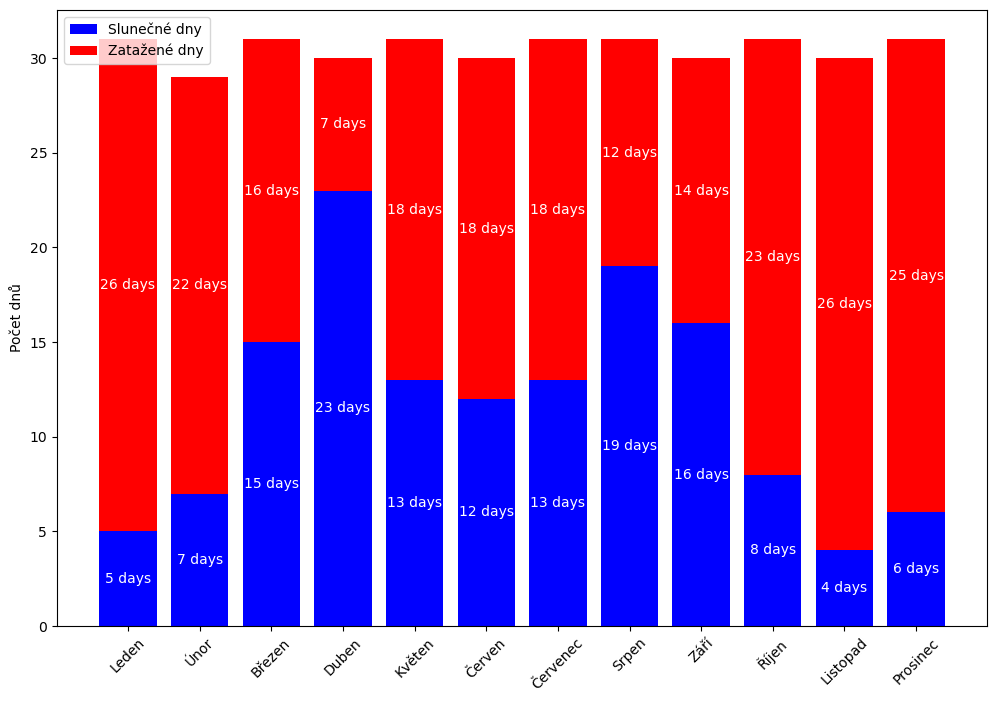

In [15]:
plt.figure(figsize=(12, 8))
bar_n = plt.bar(range(1, 13), n_nice, color='blue', label="Slunečné dny")
bar_c = plt.bar(range(1, 13), n_cloudy, color='red', bottom=n_nice, label="Zatažené dny")

plt.xticks(range(1, 13), MONTHS, rotation=45)
plt.ylabel('Počet dnů')

plt.legend()

# Přidání textu s počtem dnů na každý sloupec
for i in range(0, 12):
    plt.text(x = i+1, 
             y = n_nice.iloc[i] / 2, 
             s = f"{n_nice.iloc[i]} days", 
             ha = 'center', 
             va = 'center',
             color = 'white'
            )
    plt.text(x = i+1, 
             y = n_nice.iloc[i] + (n_cloudy.iloc[i] / 2), 
             s = f"{n_cloudy.iloc[i]} days", 
             ha = 'center',
             va = 'center',
             color = 'white'
            )

# plt.bar_label(bar_n, label_type='center', color = 'white')
# plt.bar_label(bar_c, label_type='center', color = 'white')

plt.show()

### Otázka

Co udělá parametr `ha='center'` v metodě `plt.text()`?

---
## 2. Přidání tabulky - `plt.table()`

Tabulku lze vygenerovat jako součást grafu.

### Parametry metody `plt.table()`

- `cellText` - dvourozměrný seznam hodnot pro buňky tabulky
- `rowLabels` - popisky řádků
- `colLabels` - popisky sloupců
- `loc` - umístění tabulky ('bottom', 'top', 'left', 'right', 'center')

Parametr `cellText` nepracuje správně s Pandas datasety - je nutné je převést na seznamy pomocí metody `tolist()`.

In [16]:
n_nice

Month
1      5
2      7
3     15
4     23
5     13
6     12
7     13
8     19
9     16
10     8
11     4
12     6
dtype: int64

In [17]:
n_nice.tolist()

[5, 7, 15, 23, 13, 12, 13, 19, 16, 8, 4, 6]

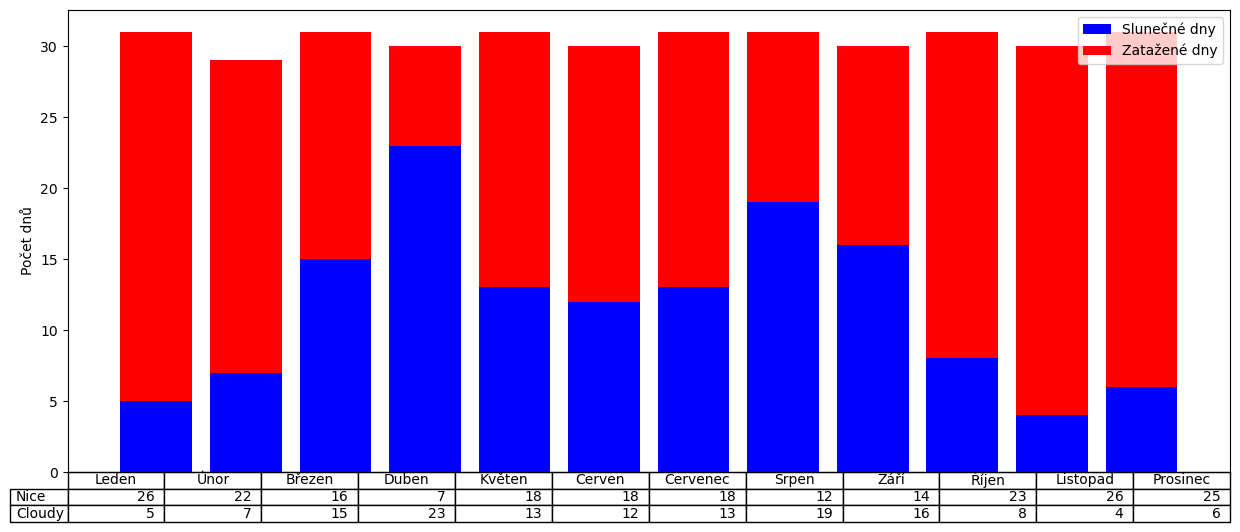

In [25]:
plt.figure(figsize=(15, 6))
plt.bar(range(1, 13), n_nice, color='blue', label="Slunečné dny")
plt.bar(range(1, 13), n_cloudy, color='red', bottom=n_nice, label="Zatažené dny")
plt.ylabel('Počet dnů')
plt.legend()
plt.xticks([])  # Prázdný seznam znamená žádné popisky na ose X

# Přidání tabulky pod graf
plt.table(cellText= [n_cloudy.tolist(), n_nice.tolist()],
          rowLabels= ['Nice', 'Cloudy'],
          colLabels = MONTHS,
          loc='bottom'
         )

plt.show()

---
## 3. Horizontální a vertikální čáry - `plt.axhline()` a `plt.axvline()`

Čáry procházející celým grafem mohou označovat hranice nebo důležité hodnoty.

### Parametry metod `plt.axhline()` a `plt.axvline()`

- `y` (pro axhline) / `x` (pro axvline) - souřadnice, kde se čára nakreslí
- `color` - barva čáry
- `linewidth` - tloušťka čáry

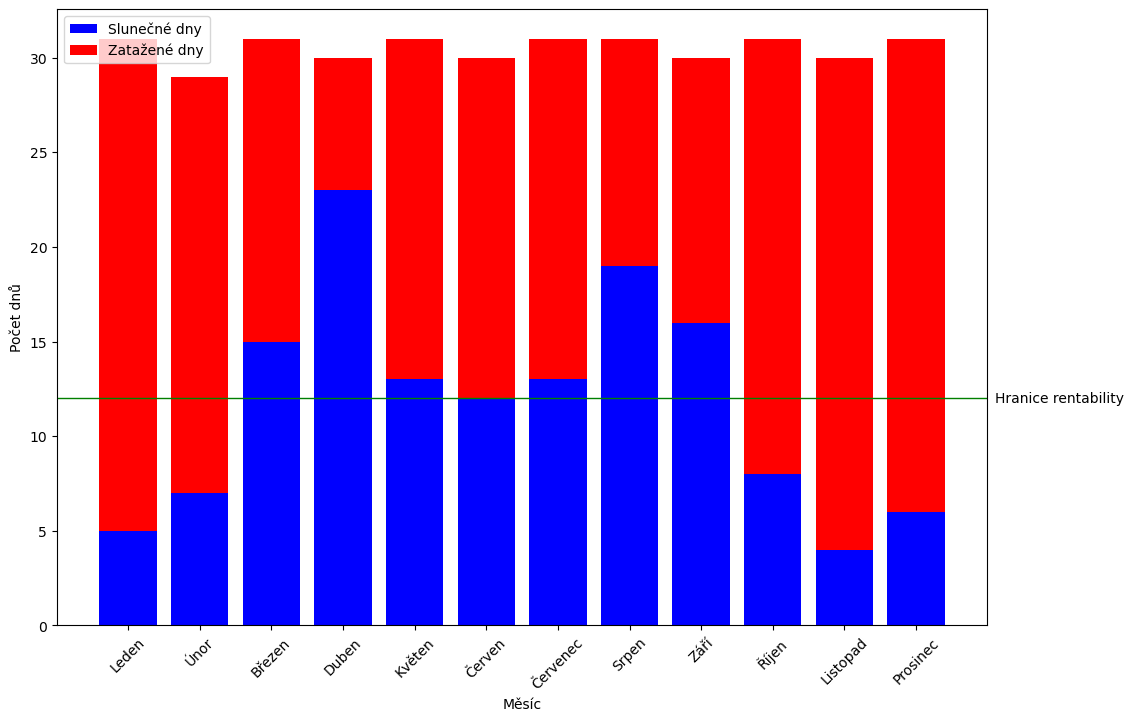

In [33]:
plt.figure(figsize=(12, 8))
plt.bar(range(1, 13), n_nice, color='blue', label="Slunečné dny")
plt.bar(range(1, 13), n_cloudy, color='red', bottom=n_nice, label="Zatažené dny")
plt.xticks(range(1, 13), MONTHS, rotation=45)
plt.ylabel('Počet dnů')
plt.xlabel('Měsíc')
plt.legend()

# Přidání horizontální čáry
plt.axhline(12, color = 'green', linewidth= 1)
plt.text(x = 13.1, y = 12, s = 'Hranice rentability', va='center')

plt.show()

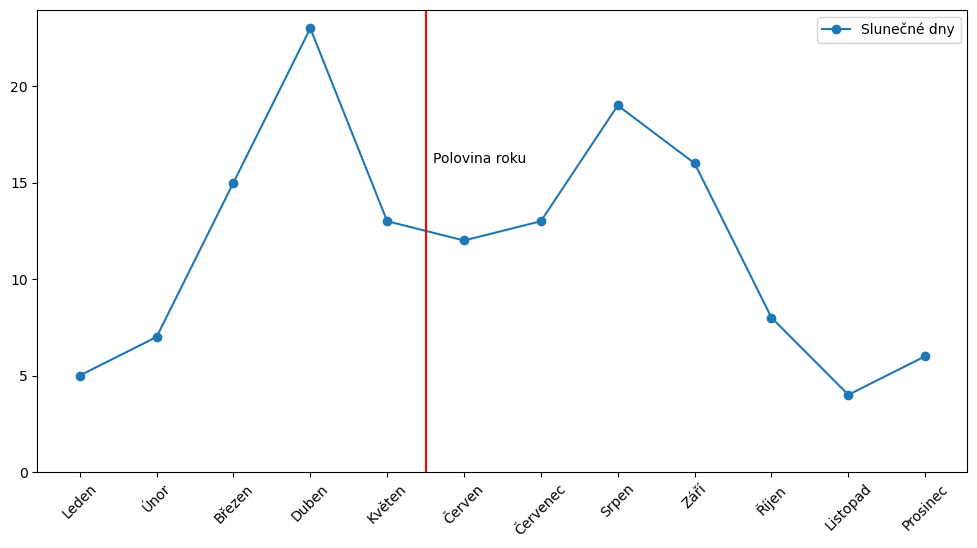

In [39]:
# Ukázka vertikální čáry
plt.figure(figsize=(12, 6))
plt.plot(range(1, 13), n_nice, 'o-', label='Slunečné dny')

# Vertikální čára oddělující první a druhé pololetí
plt.axvline(5.5, color = 'red')
plt.text(x = 5.6, y = 16, s = 'Polovina roku')
plt.ylim(0)

plt.xticks(range(1, 13), MONTHS, rotation=45)
plt.legend()
plt.show()

---
## 4. Diagonální čáry - `plt.axline()`

Diagonální čáry se přidávají pomocí dvou bodů, kterými čára prochází.

### Parametry metody `plt.axline()`

- `p1` - první bod, kterým čára prochází (tuple x, y)
- `p2` - druhý bod, kterým čára prochází (tuple x, y)
- `color` - barva čáry
- `linewidth` - tloušťka čáry

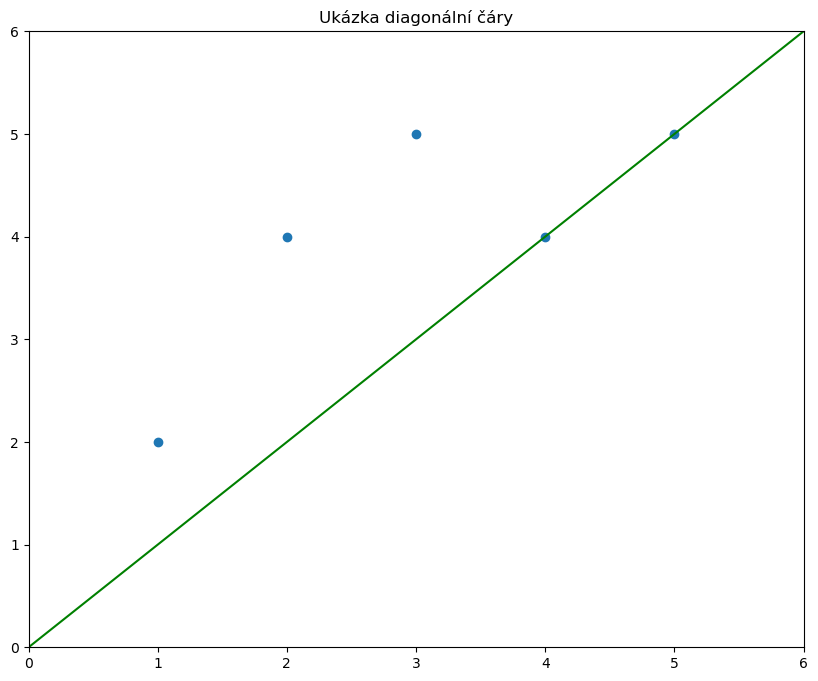

In [40]:
plt.figure(figsize=(10, 8))
plt.scatter([1, 2, 3, 4, 5], [2, 4, 5, 4, 5])

# Diagonální čára procházející body (0, 0) a (5, 5)
plt.axline((0,0), (5,5), color = 'green')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.title('Ukázka diagonální čáry')
plt.show()

---
## 5. Anotace - `plt.annotate()`

Anotace je kombinace šipky směřující na bod a textu na začátku šipky.

In [41]:
# Vytvoření ukázkových dat - denní teploty
import numpy as np
np.random.seed(42)
daily_temps = np.concatenate([
    np.random.normal(-2, 3, 31),   # Leden
    np.random.normal(0, 3, 29),    # Únor
    np.random.normal(5, 4, 31),    # Březen
    np.random.normal(10, 4, 30),   # Duben
    np.random.normal(15, 4, 31),   # Květen
    np.random.normal(18, 3, 30),   # Červen
    np.random.normal(21, 3, 31),   # Červenec
    np.random.normal(20, 3, 31),   # Srpen
    np.random.normal(15, 4, 30),   # Září
    np.random.normal(10, 4, 31),   # Říjen
    np.random.normal(4, 3, 30),    # Listopad
    np.random.normal(0, 3, 31)     # Prosinec
])

### Parametry metody `plt.annotate()`

- `text` - text anotace (prázdný string zobrazí pouze šipku)
- `xy` - souřadnice bodu, na který šipka směřuje
- `xytext` - souřadnice, kde bude text zobrazen
- `fontsize` - velikost písma
- `arrowprops` - slovník určující vzhled šipky:
  - `width` - tloušťka šipky
  - `facecolor` - barva šipky

In [44]:
np.argmax(daily_temps)

np.int64(209)

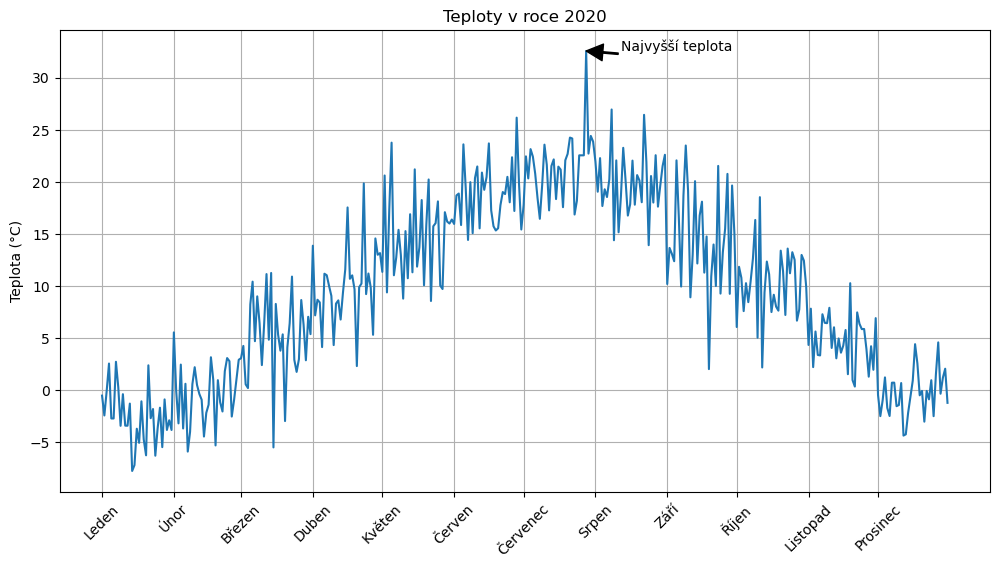

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(daily_temps)
plt.xticks(MONTH_CHANGE, MONTHS, rotation=45)
plt.ylabel('Teplota (°C)')
plt.title('Teploty v roce 2020')
plt.grid()

# Přidání anotace
max_idx = np.argmax(daily_temps) # vrátí index, kde je v poli max. hodnota


plt.annotate(text = 'Najvyšší teplota',
             xy = (max_idx, daily_temps[max_idx]),
             xytext = (max_idx + 15, daily_temps[max_idx]),
             arrowprops= dict(width = 1, facecolor = 'black')
            )

plt.show()

### Otázka

Jaký je rozdíl mezi parametry `xy` a `xytext` v metodě `plt.annotate()`?

---
## 6. Výběr části grafu - `plt.axhspan()` a `plt.axvspan()`

Tyto metody umožňují zvýraznit horizontální nebo vertikální oblast grafu.

### Parametry metody `plt.axhspan()`/`plt.axvspan()`

- `ymin` - hodnota na ose y, kde výběr začíná (v jednotkách grafu)
- `ymax` - hodnota na ose y, kde výběr končí (v jednotkách grafu)
- `xmin` - hodnota na ose x, kde výběr začíná (hodnota 0 až 1)
- `xmax` - hodnota na ose x, kde výběr končí (hodnota 0 až 1)
- `alpha` - průhlednost (0 = zcela průhledné, 1 = neprůhledné)
- `color` - barva zvýraznění

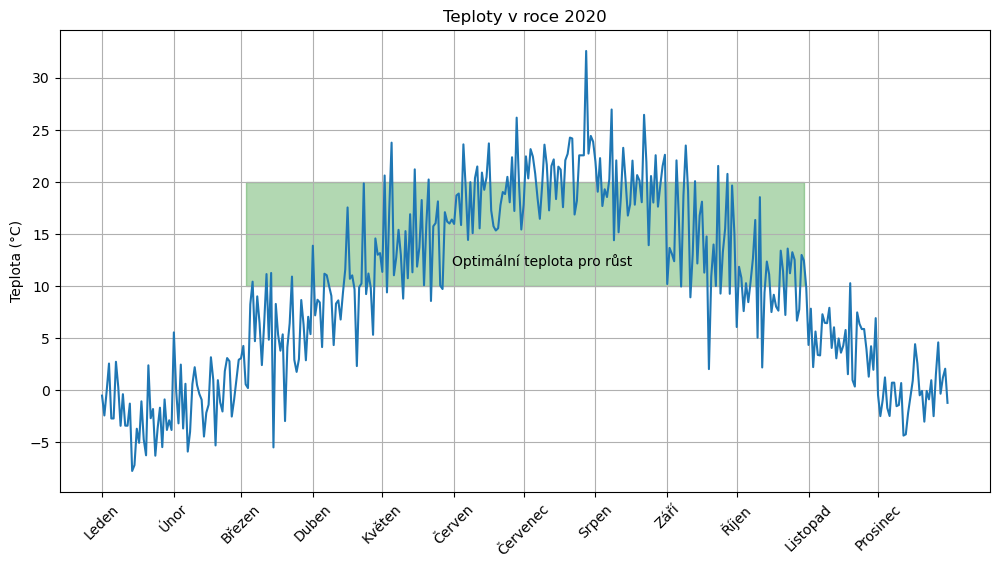

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(daily_temps)
plt.xticks(MONTH_CHANGE, MONTHS, rotation=45)
plt.ylabel('Teplota (°C)')
plt.title('Teploty v roce 2020')
plt.grid()

# Zvýraznění horizontální oblasti (optimální teplota pro růst rostlin)

plt.axhspan(ymin = 10, 
            ymax = 20, 
            xmin = 0.2,
            xmax = 0.8,
            color = 'green', 
            alpha = 0.3
           )
plt.text(190, 12, "Optimální teplota pro růst", fontsize=10, ha='center')

plt.show()

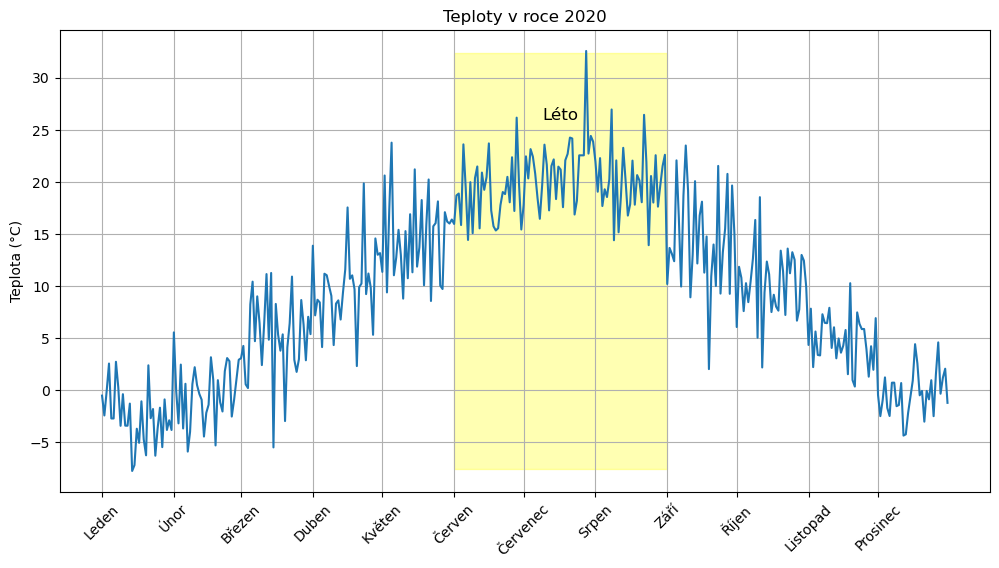

In [68]:
# Ukázka vertikálního výběru - zvýraznění letních měsíců
plt.figure(figsize=(12, 6))
plt.plot(daily_temps)
plt.xticks(MONTH_CHANGE, MONTHS, rotation=45)
plt.ylabel('Teplota (°C)')
plt.title('Teploty v roce 2020')
plt.grid()

# Zvýraznění letních měsíců (červen-srpen)
plt.axvspan(xmin = MONTH_CHANGE[5], 
            xmax = MONTH_CHANGE[8], 
            ymin = 0.05,
            ymax = 0.95,
            color = 'yellow', 
            alpha = 0.3)
plt.text(198, 26, "Léto", fontsize=12, ha='center')

plt.show()

### Oprav chybu

V následujícím kódu chybí parametr pro průhlednost. Doplň ho tak, aby zvýraznění bylo poloprůhledné.

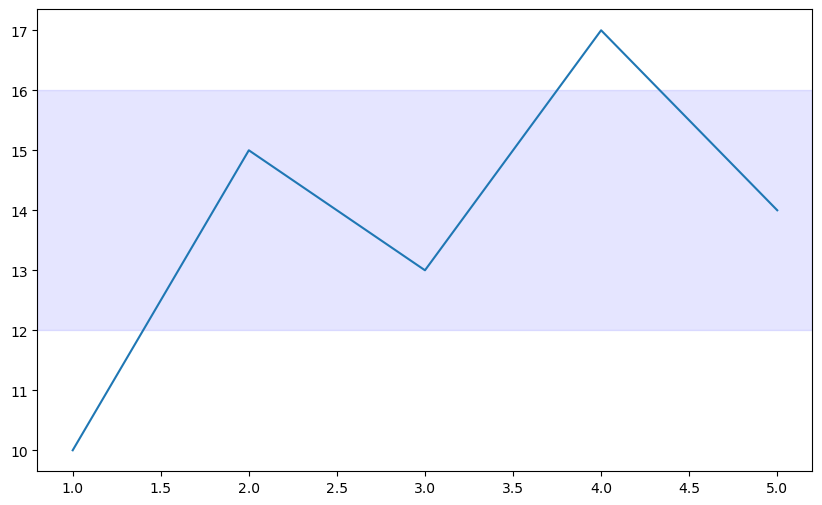

In [71]:
# DOPLŇ CHYBĚJÍCÍ PARAMETR:
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4, 5], [10, 15, 13, 17, 14])
plt.axhspan(12, 16, color='blue', alpha = 0.1)  
plt.show()

---
## 7. Obrázek jako pozadí grafu

Matplotlib umožňuje použít obrázek jako pozadí grafu. To je užitečné například když chceme zobrazit data na mapě.

Postup má 3 kroky:
1. Načíst obrázek ze souboru pomocí `mpimg.imread()`
2. Zobrazit obrázek pomocí `plt.imshow()`
3. Překrýt obrázek grafem

### Metody pro práci s obrázky

**`mpimg.imread(fname)`**
- `fname` - cesta k souboru s obrázkem
- Vrací vícerozměrný seznam s informacemi o pixelech

**`plt.imshow(X)`**
- `X` - seznam s daty o pixelech k zobrazení
- Překryje obrázek jako pozadí aktuálního grafu


### Krok 1: Import knihovny pro práci s obrázky

In [72]:
# import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Speciální modul pro načítání obrázků

### Krok 2: Načtení obrázku ze souboru

Funkce `mpimg.imread()` načte obrázek a uloží ho jako pole čísel (každý pixel má hodnoty pro červenou, zelenou a modrou barvu).

In [73]:
# Načtení obrázku mapy Polska
img = mpimg.imread('Plots_data/Poland_map.jpg')

In [74]:
# Co je v proměnné img? Pole čísel reprezentující pixely
type(img)

numpy.ndarray

In [75]:
# Rozměry obrázku: (výška, šířka, 3 barvy RGB)
img.shape

(1024, 1099, 3)

### Krok 3: Zobrazení samotného obrázku

Funkce `plt.imshow()` zobrazí obrázek v grafu.

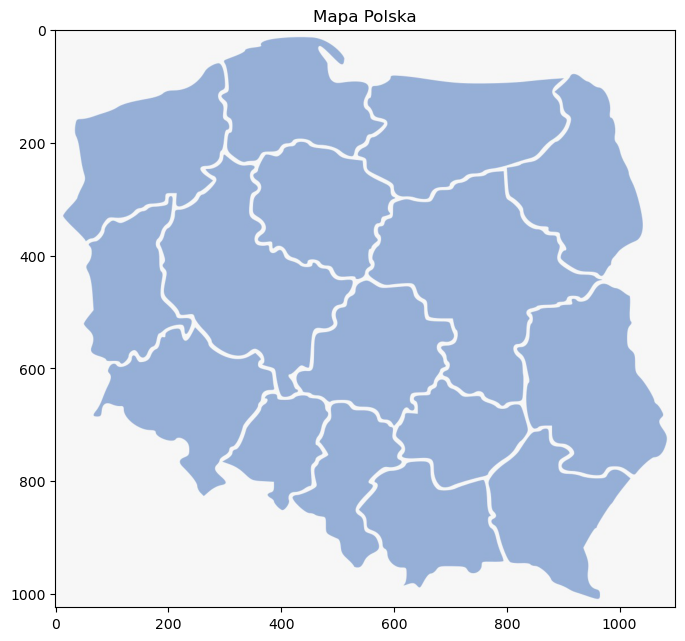

In [76]:
# Zobrazení obrázku
plt.figure(figsize=(8, 10))

plt.imshow(img)

plt.title('Mapa Polska')
plt.show()

### Krok 4: Zjištění souřadnic obrázku

Obrázek má souřadnice v pixelech - osa X jde od 0 do šířky, osa Y od 0 do výšky.

In [77]:
vyska = img.shape[0]
sirka = img.shape[1]
print(f"{sirka} x {vyska} pixelů")


1099 x 1024 pixelů


### Krok 5: Přidání grafu přes obrázek

Teď přidáme body reprezentující města a jejich průměrné teploty. Body musíme umístit podle pixelových souřadnic obrázku.

In [79]:
# Simulovaná data - města a jejich přibližné pozice na mapě (v pixelech)
# Souřadnice je třeba odhadnout podle rozměrů vašeho obrázku

mesta = {
    'Warszawa': {'x': 520, 'y': 280, 'teplota': 3.5},
    'Kraków': {'x': 470, 'y': 450, 'teplota': 9.2},
    'Wrocław': {'x': 300, 'y': 340, 'teplota': 9.8},
    'Gdańsk': {'x': 420, 'y': 80, 'teplota': 1.5},
    'Poznań': {'x': 280, 'y': 240, 'teplota': 8.8}
}

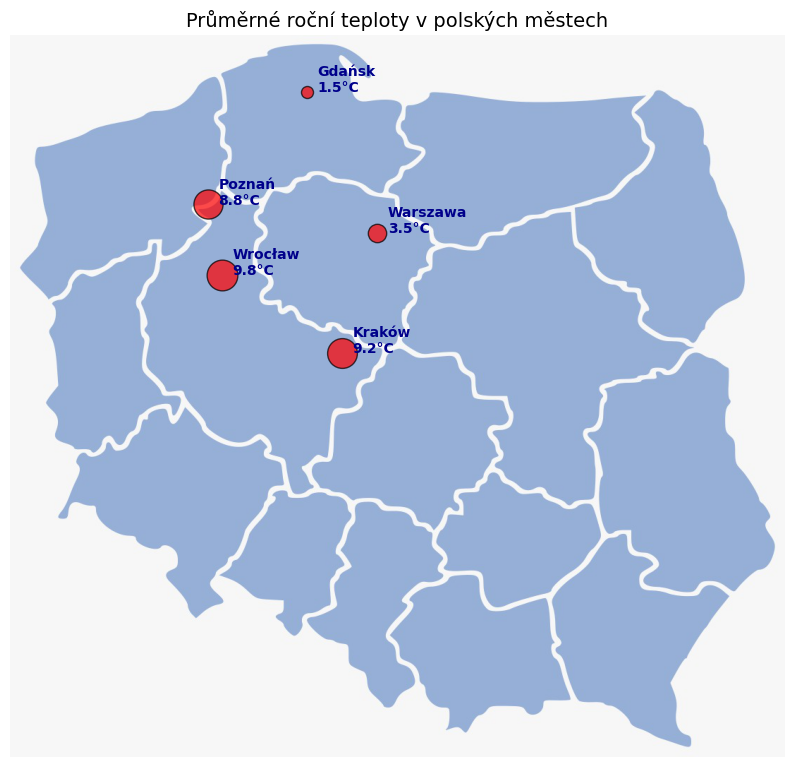

In [83]:
plt.figure(figsize=(10, 12))

# 1. Nejdříve zobrazíme obrázek jako pozadí
plt.imshow(img)

# 2. Přidáme body pro města (scatter plot)
for mesto, data in mesta.items():
    plt.scatter(data['x'], data['y'], 
                s=data['teplota'] * 50,  # Velikost bodu podle teploty
                c='red', 
                alpha=0.7,
                edgecolors='black')
# 3. Přidáme popisky měst
    plt.text(data['x'] + 15, 
             data['y'], 
             f"{mesto}\n{data['teplota']}°C", 
             fontsize=10, 
             color='darkblue',
             fontweight='bold')
  
plt.title('Průměrné roční teploty v polských městech', fontsize=14)
plt.axis('off')  # Skryjeme osy (nepotřebujeme vidět pixelové souřadnice)
plt.show()

---
## ÚLOHY

### ÚLOHA 1: Městská kola Wroclaw

V souboru **Ride_history.csv** najdete data o výpůjčkách městských kol ve Wroclawi.

Načtěte data ze souboru a poté vyberte pouze ty, kde jsou stanice výpůjčky a vrácení stejné a výpůjčky jsou kratší než 100 minut.

Zobrazte v grafu, kolik výpůjček dané délky bylo (první sloupec: výpůjčky trvající jednu minutu, druhý - dvě minuty atd.).

Výpůjčky, které začínají a končí na stejné stanici a trvají maximálně tři minuty, jsou pravděpodobně výpůjčky vadných kol. Nakreslete červenou čáru, která odděluje výpůjčky kratší a delší než 3 minuty.

Přidejte také anotaci vysvětlující, co tato čára znamená.

In [ ]:
# Vaše řešení zde


In [84]:
# Načtení dat
df_bikes = pd.read_csv('Plots_data/Ride_history.csv', encoding='Windows-1250')

In [85]:
df_bikes.head()

,Check-out UID,Bike number,Check-out time,Check-in time,Check out dock,Check in dock,Ride duration
0,112512738,57243,2021-03-03 23:41:47,2021-03-04 00:00:34,Plac Grunwaldzki / Polaka,Undocked,19
1,112512783,57434,2021-03-03 23:46:14,2021-03-04 00:00:41,Bezpieczna/Jugosławiańska,Kurkowa / Dubois,15
2,112512778,650040,2021-03-03 23:45:30,2021-03-04 00:02:33,al. Kochanowskiego / Kopernika,Rondo Reagana,18
3,112512869,57441,2021-03-03 23:53:59,2021-03-04 00:05:08,Plac Świętego Macieja / Trzebnicka,Nowowiejska / Górnickiego,12
4,112512830,651044,2021-03-03 23:50:10,2021-03-04 00:07:12,Powstańców Śląskich/Orla,Szewska / Kazimierza Wielkiego,18


In [86]:
df_bikes.columns

Index(['Check-out UID', 'Bike number', 'Check-out time', 'Check-in time',
       'Check out dock', 'Check in dock', 'Ride duration'],
      dtype='object')

In [87]:
# Filtrování: stejná stanice výpůjčky a vrácení, doba < 100 minut
# Sloupce: 'Check out dock', 'Check in dock', 'Ride duration'

mask = (df_bikes['Check out dock'] == df_bikes['Check in dock']) & (df_bikes['Ride duration'] < 100)
df_filtered = df_bikes[mask]

In [88]:
print(f"Počet výpůjček po filtrování: {len(df_filtered)}")

Počet výpůjček po filtrování: 426


In [92]:
df_filtered['Ride duration'].value_counts()

Ride duration
1     99
2     56
3     49
4     18
5     16
9     14
8     13
6     12
17    12
15    11
13    11
20    11
7     10
11    10
18     8
12     8
10     7
41     6
19     5
27     4
16     4
28     3
34     3
24     3
40     2
55     2
37     2
21     2
29     2
57     2
60     2
46     2
39     1
32     1
14     1
25     1
83     1
42     1
51     1
36     1
26     1
92     1
53     1
59     1
91     1
31     1
72     1
48     1
63     1
Name: count, dtype: int64

In [93]:
df_filtered['Ride duration'].value_counts().sort_index() # v indexu je počet minut

Ride duration
1     99
2     56
3     49
4     18
5     16
6     12
7     10
8     13
9     14
10     7
11    10
12     8
13    11
14     1
15    11
16     4
17    12
18     8
19     5
20    11
21     2
24     3
25     1
26     1
27     4
28     3
29     2
31     1
32     1
34     3
36     1
37     2
39     1
40     2
41     6
42     1
46     2
48     1
51     1
53     1
55     2
57     2
59     1
60     2
63     1
72     1
83     1
91     1
92     1
Name: count, dtype: int64

In [27]:
# Počet výpůjček podle délky trvání
duration_counts = df_filtered['Ride duration'].value_counts().sort_index()

# Omezení na 1-99 minut
duration_counts = duration_counts[(duration_counts.index >= 1) & (duration_counts.index < 100)]

In [28]:
duration_counts.head(10)

Ride duration
1     99
2     56
3     49
4     18
5     16
6     12
7     10
8     13
9     14
10     7
Name: count, dtype: int64

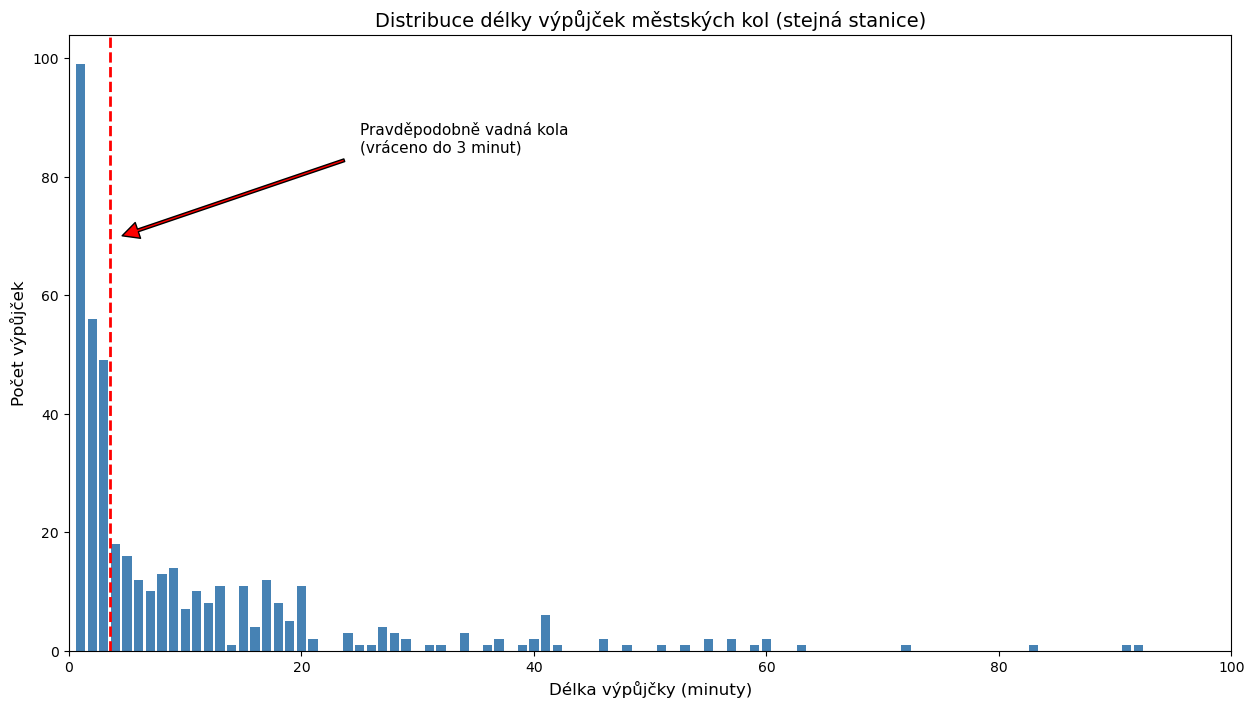

In [43]:
# Vytvoření grafu
plt.figure(figsize=(15, 8))

plt.bar(duration_counts.index, duration_counts.values, color='steelblue')

# Červená vertikální čára na 3 minutách (mezi 3 a 4 minutou)
plt.axvline(x=3.5, color='red', linewidth=2, linestyle='--')

# Anotace vysvětlující čáru
plt.annotate('Pravděpodobně vadná kola\n(vráceno do 3 minut)', 
             xy=(3.5, duration_counts.max() * 0.7),
             xytext=(25, duration_counts.max() * 0.85),
             fontsize=11,
             arrowprops=dict(facecolor='red', width=2, shrink=0.05))

plt.xlabel('Délka výpůjčky (minuty)', fontsize=12)
plt.ylabel('Počet výpůjček', fontsize=12)
plt.title('Distribuce délky výpůjček městských kol (stejná stanice)', fontsize=14)
plt.xlim(0, 100)

plt.show()

### ÚLOHA 2: Tabulka věkových skupin

V souboru **wpb_votes_list_2019.csv** najdete data o hlasování v rámci Wroclawského občanského rozpočtu.

Načtěte data a filtrujte je tak, abyste získali:
1. Ženy mladší 100 let
2. Muže mladší 100 let

Nakreslete kumulativní graf zobrazující, kolik lidí daného věku hlasovalo (rozděleno podle pohlaví).

>Tip: Pro správné vygenerování grafu musíte zajistit, aby obě řady měly stejnou délku. Použijte metodu `reindex` s parametrem `fill_value`:
> `s_reindexed = s.reindex(range(0, 100), fill_value=0)`

Po vytvoření grafu vygenerujte tabulku, která zobrazí tato data pod ním. Tabulku s obsahem buněk a popisky řádků vygenerujte pomocí cyklu:
```python
cells = []
cellLabels = []
for i in range(0, 100):
    cells.append([pocet_zen_vek_i, pocet_muzu_vek_i])
    cellLabels.append(f'{i}')
```

In [ ]:
# Vaše řešení zde


In [94]:
# Načtení dat
df_votes = pd.read_csv('Plots_data/wpb_votes_list_2019.csv')

In [95]:
df_votes.head()

,No,Date,Age,Sex,Post_Code,Source,Local,General
0,1,"9:01:21, 20-09-2019",33,F,54-117,I,256,132
1,2,"9:01:32, 20-09-2019",38,F,54-131,I,323,255
2,3,"9:02:28, 20-09-2019",32,F,54-107,I,256,132
3,4,"9:02:44, 20-09-2019",36,M,53-339,I,4,5
4,5,"9:02:51, 20-09-2019",31,M,50-231,I,108,120


In [96]:
df_votes.columns

Index(['No', 'Date', 'Age', 'Sex', 'Post_Code', 'Source', 'Local', 'General'], dtype='object')

In [97]:
# Filtrování žen a mužů mladších 100 let
# Sloupce: 'Age', 'Sex' (F/M)

women = df_votes[(df_votes['Sex'] == 'F') & (df_votes['Age'] < 100)]
men = df_votes[(df_votes['Sex'] == 'M') & (df_votes['Age'] < 100)]

In [98]:
print(f"Počet žen: {len(women)}")
print(f"Počet mužů: {len(men)}")

Počet žen: 45809
Počet mužů: 37191


In [99]:
# Počet hlasujících podle věku
women_by_age = women.groupby('Age').size()
men_by_age = men.groupby('Age').size()

# Reindexování pro zajištění stejné délky (0-99 let)
women_by_age = women_by_age.reindex(range(0, 100), fill_value=0)
men_by_age = men_by_age.reindex(range(0, 100), fill_value=0)

In [100]:
# Kumulativní součet
women_cumsum = women_by_age.cumsum()
men_cumsum = men_by_age.cumsum()

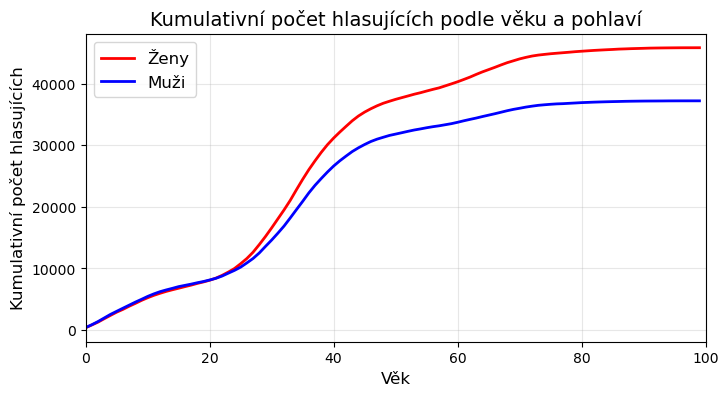

In [103]:
# Kumulativní graf
plt.figure(figsize=(8, 4))

plt.plot(women_cumsum.index, women_cumsum.values, label='Ženy', color='red', linewidth=2)
plt.plot(men_cumsum.index, men_cumsum.values, label='Muži', color='blue', linewidth=2)

plt.xlabel('Věk', fontsize=12)
plt.ylabel('Kumulativní počet hlasujících', fontsize=12)
plt.title('Kumulativní počet hlasujících podle věku a pohlaví', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(0, 100)

plt.show()

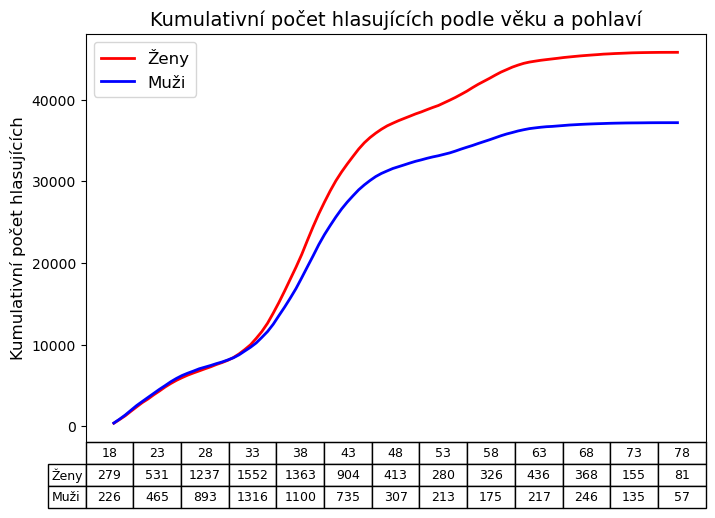

In [105]:
# Graf s tabulkou - omezíme na věkové rozmezí 18-80 pro čitelnost
age_range = list(range(18, 81, 5))  # Po 5 letech pro přehlednost

plt.figure(figsize=(8, 6))

plt.plot(women_cumsum.index, women_cumsum.values, label='Ženy', color='red', linewidth=2)
plt.plot(men_cumsum.index, men_cumsum.values, label='Muži', color='blue', linewidth=2)

plt.xlabel('')
plt.ylabel('Kumulativní počet hlasujících', fontsize=12)
plt.title('Kumulativní počet hlasujících podle věku a pohlaví', fontsize=14)
plt.legend(fontsize=12)
plt.xticks([])

# Příprava dat pro tabulku
women_values = [women_by_age.iloc[i] for i in age_range]
men_values = [men_by_age.iloc[i] for i in age_range]

# Tabulka
table = plt.table(cellText=[women_values, men_values],
                  rowLabels=['Ženy', 'Muži'],
                  colLabels=[str(i) for i in age_range],
                  loc='bottom',
                  cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

plt.subplots_adjust(bottom=0.2)
plt.show()

### ÚLOHA 3: Kombinace prvků

Vytvořte graf s denními teplotami (můžete použít simulovaná data `daily_temps` z výše), který obsahuje:
1. Horizontální čáru na hodnotě 0°C (bod mrazu)
2. Text "Bod mrazu" vedle této čáry
3. Zvýrazněnou oblast pro teploty pod nulou (modrá barva)
4. Zvýrazněnou oblast pro teploty nad 15°C (červená barva)
5. Anotaci označující nejnižší teplotu

In [ ]:
# Vaše řešení zde


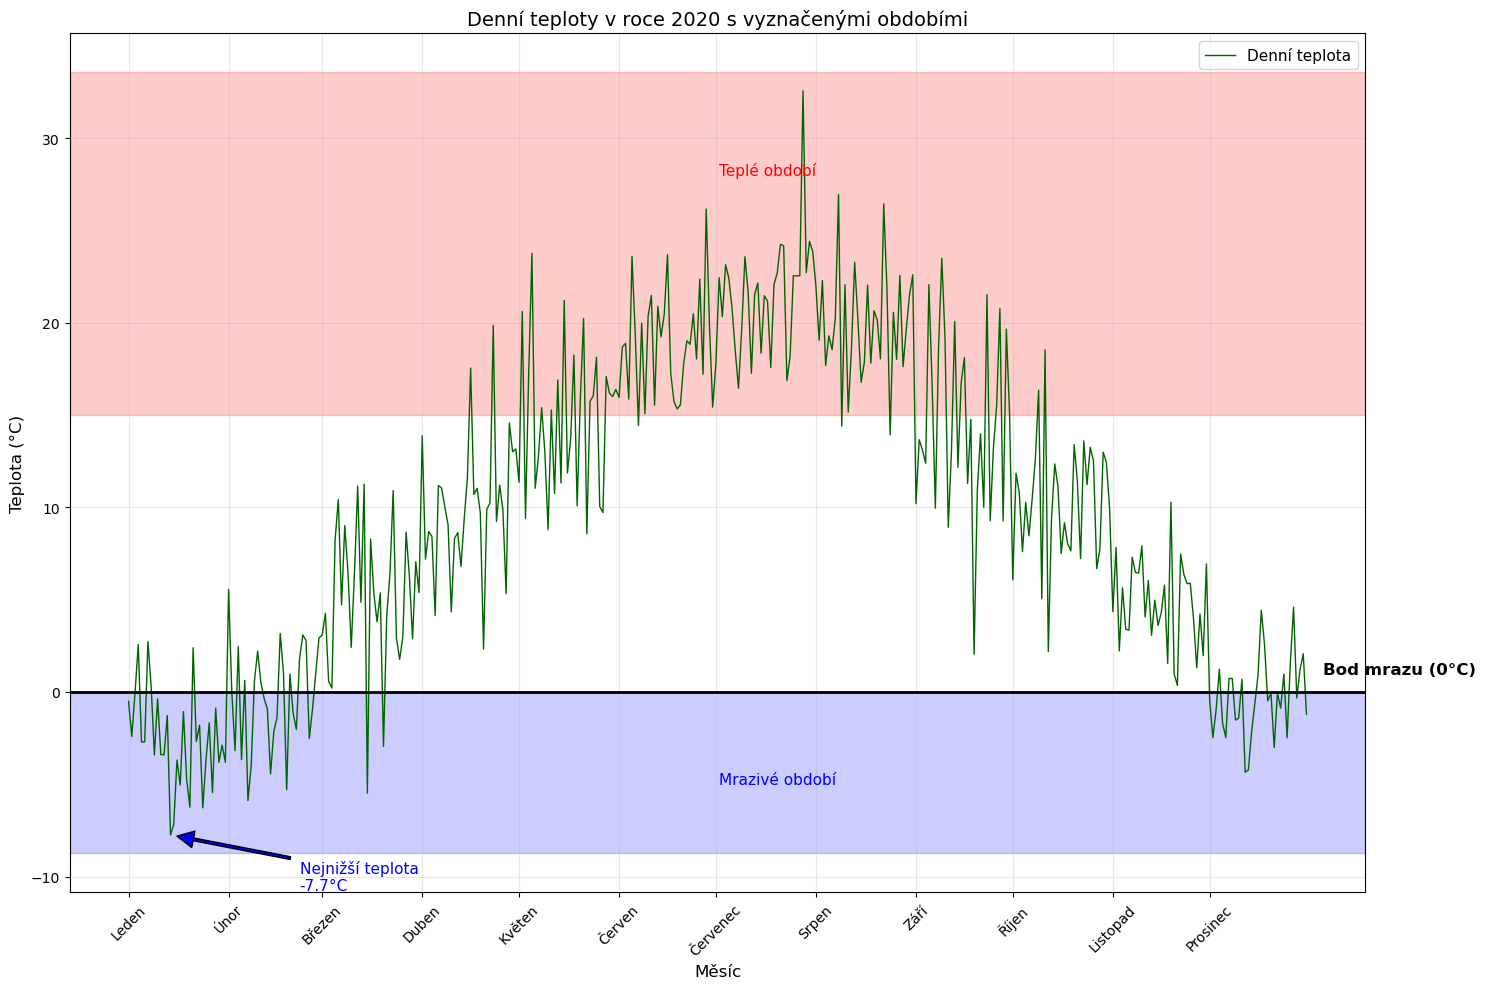

In [115]:
plt.figure(figsize=(15, 10))

# Graf denních teplot
plt.plot(daily_temps, color='darkgreen', linewidth=1, label='Denní teplota')

# 1. Horizontální čára na 0°C
plt.axhline(0, color='black', linewidth=2, linestyle='-')

# 2. Text "Bod mrazu"
plt.text(370, 1, "Bod mrazu (0°C)", fontsize=12, color='black', fontweight='bold')

# 3. Zvýrazněná oblast pro teploty pod nulou (modrá)
plt.axhspan(daily_temps.min() - 1, 0, color='blue', alpha=0.2)
plt.text(366/2, -5, "Mrazivé období", fontsize=11, color='blue')

# 4. Zvýrazněná oblast pro teploty nad 15°C (červená)
plt.axhspan(15, daily_temps.max() + 1, color='red', alpha=0.2)
plt.text(366/2, 28, "Teplé období", fontsize=11, color='red')

# 5. Anotace pro nejnižší teplotu
min_idx = np.argmin(daily_temps)
min_temp = daily_temps[min_idx]
plt.annotate(f'Nejnižší teplota\n{min_temp:.1f}°C', 
             xy=(min_idx, min_temp),
             xytext=(min_idx + 40, min_temp - 3),
             fontsize=11,
             arrowprops=dict(facecolor='blue', width=2, shrink=0.05),
             color='blue')

# Nastavení os
plt.xticks(MONTH_CHANGE, MONTHS, rotation=45)
plt.xlabel('Měsíc', fontsize=12)
plt.ylabel('Teplota (°C)', fontsize=12)
plt.title('Denní teploty v roce 2020 s vyznačenými obdobími', fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## Přehled použitých metod

| Metoda | Popis | Hlavní parametry |
|--------|-------|------------------|
| `plt.text(x, y, s)` | Přidá text na zadané souřadnice | `x`, `y`, `s`, `color`, `fontsize`, `rotation`, `ha`, `va` |
| `plt.table()` | Přidá tabulku do grafu | `cellText`, `rowLabels`, `colLabels`, `loc` |
| `plt.axhline(y)` | Přidá horizontální čáru | `y`, `color`, `linewidth` |
| `plt.axvline(x)` | Přidá vertikální čáru | `x`, `color`, `linewidth` |
| `plt.axline(p1, p2)` | Přidá diagonální čáru | `p1`, `p2`, `color`, `linewidth` |
| `plt.annotate(text, xy)` | Přidá anotaci se šipkou | `text`, `xy`, `xytext`, `arrowprops`, `fontsize` |
| `plt.axhspan(ymin, ymax)` | Zvýrazní horizontální oblast | `ymin`, `ymax`, `xmin`, `xmax`, `alpha`, `color` |
| `plt.axvspan(xmin, xmax)` | Zvýrazní vertikální oblast | `xmin`, `xmax`, `ymin`, `ymax`, `alpha`, `color` |
| `mpimg.imread(cesta)` | Načte obrázek ze souboru do pole | `img = mpimg.imread('mapa.jpg')` |
| `plt.imshow(X)` | Zobrazí obrázek v grafu | `X`, `cmap` |
| `img.shape` | Vrátí rozměry obrázku (výška, šířka, barvy) | |
| `img.ravel()` | Převede vícerozměrné pole na jednorozměrné | - |

**Důležité:** Když kreslíte graf přes obrázek, souřadnice grafu odpovídají pixelům obrázku (X: 0 až šířka, Y: 0 až výška).